<a href="https://colab.research.google.com/github/isuriperera1/HopeBridge/blob/Face-Recognition/Face_Recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
!pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation

In [17]:
pip install opencv-python opencv-python-headless numpy
!pip install ipywidgets

In [19]:
import cv2
import io
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from PIL import Image

def detect_face(image_path):
    """Detects faces in an image and draws bounding boxes around them.

    Args:
        image_path: Path to the input image file.

    Returns:
        The image with detected faces, or None if an error occurs.
    """
    # Load the pre-trained Haar Cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the image
    img = cv2.imread(image_path)

    if img is None:
        print("Error loading image")
        return None

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print("No faces detected")
        return img

    # Draw rectangle around faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Save and show the image with the face detected
    output_path = 'output_image.jpg'
    cv2.imwrite(output_path, img)

    # Convert the image to RGB format for display in the notebook
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the output using PIL and IPython.display
    display(Image.fromarray(img_rgb))

    return img

def handle_upload(change):
    """Handles the uploaded image.

    Args:
        change: The change event.
    """
    uploaded_filename = next(iter(change['new']))
    content = change['new'][uploaded_filename]['content']
    # Process the uploaded image
    with io.BytesIO(content) as f:
        f.seek(0)  # Reset file pointer to the beginning
        image = Image.open(f)
        image.save("uploaded_image.jpg")  # Save the image to a temporary file
        detect_face("uploaded_image.jpg")  # Call detect_face on the temporary file


# Create an upload widget
uploader = widgets.FileUpload(
    accept='image/*',  # Accepted file types
    multiple=False  # Only allow single file upload
)

# Display the upload widget and attach the handler
display(uploader)
uploader.observe(handle_upload, names='value')  # Observe changes in the 'value' property

FileUpload(value={}, accept='image/*', description='Upload')

No faces detected


1/1 [==============================] - 0s 181ms/step


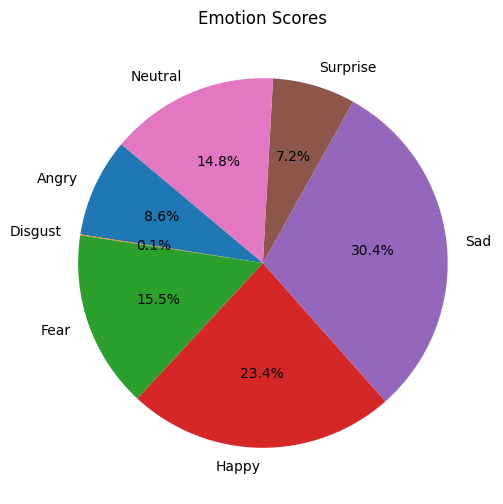

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained model
model_path = 'FR_Model.h5'
model = load_model(model_path)

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess an image
def preprocess_image(image_path, target_size):
    image = load_img(image_path, target_size=target_size)  # Resize the image
    image_array = img_to_array(image)
    image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array /= 255.0  # Normalize the image
    return image_array

# Example: Provide the path to your test image
test_image_path = 'image.jpeg'  # Replace with your image path
image = preprocess_image(test_image_path, target_size=(48, 48))  # Resize to 48x48

# Make predictions
predictions = model.predict(image)[0]  # Get the first prediction from the batch

# Visualize the scores in a pie chart
plt.figure(figsize=(10, 6))
plt.pie(predictions, labels=emotion_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Emotion Scores')
plt.show()


In [11]:
!pip install ipywidgets

FileUpload(value={}, accept='image/*', description='Upload')

1/1 [==============================] - 0s 141ms/step


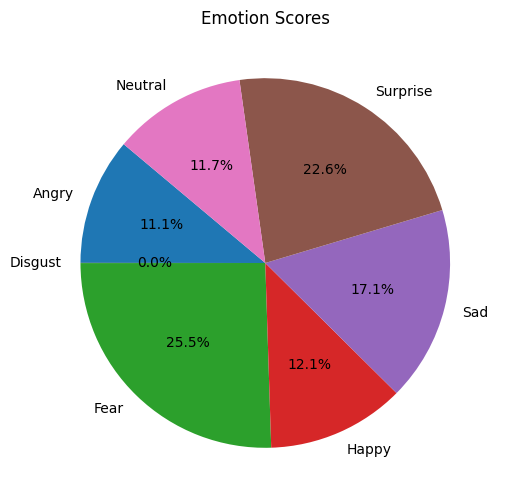

1/1 [==============================] - 0s 26ms/step


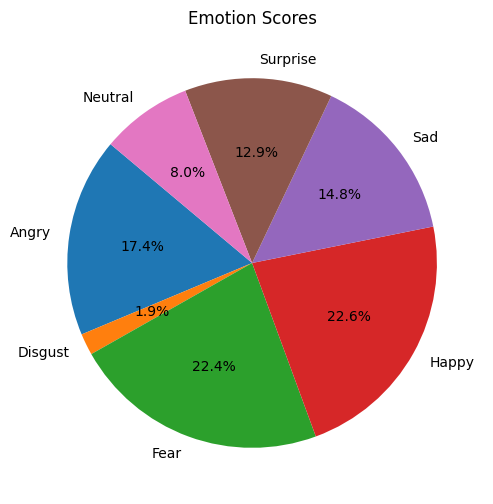

1/1 [==============================] - 0s 28ms/step


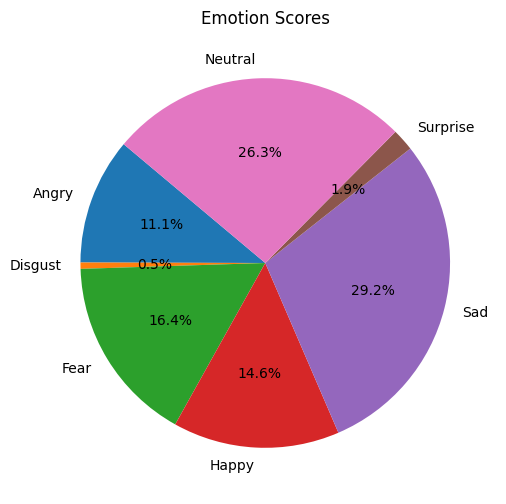

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt
import io
from IPython.display import display
import ipywidgets as widgets

# Load the pre-trained model
model_path = 'FR_Model.h5'
model = load_model(model_path)

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess an image
def preprocess_image(image_path, target_size):
    image = load_img(image_path, target_size=target_size)  # Resize the image
    image_array = img_to_array(image)
    image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array /= 255.0  # Normalize the image
    return image_array


# Function to handle uploaded image
def handle_upload(change):
    uploaded_filename = next(iter(change['new']))
    content = change['new'][uploaded_filename]['content']
    # Process the uploaded image
    with io.BytesIO(content) as f:
        image_path = f
        # Preprocess the selected image
        image = preprocess_image(image_path, target_size=(48, 48))  # Resize to 48x48

        # Make predictions
        predictions = model.predict(image)[0]  # Get the first prediction from the batch

        # Visualize the scores in a pie chart
        plt.figure(figsize=(10, 6))
        plt.pie(predictions, labels=emotion_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
        plt.title('Emotion Scores')
        plt.show()


# Create an upload widget
uploader = widgets.FileUpload(
    accept='image/*',  # Accepted file types
    multiple=False  # Only allow single file upload
)

# Display the upload widget and attach the handler
display(uploader)
uploader.observe(handle_upload, names='value')  # Observe changes in the 'value' property

FileUpload(value={}, accept='image/*', description='Upload')

1/1 [==============================] - 0s 165ms/step


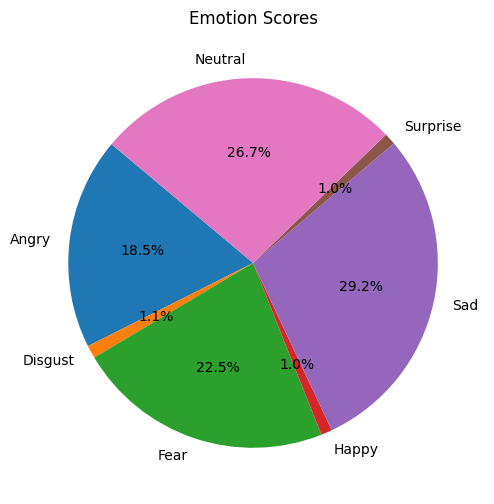

In [16]:
!pip install ipywidgets
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt
import io
from IPython.display import display
import ipywidgets as widgets

# Load the pre-trained model
model_path = 'FR_Model.h5'
model = load_model(model_path)

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Load and preprocess an image
def preprocess_image(image, target_size):
    image = image.resize(target_size)  # Resize the image
    image_array = img_to_array(image)
    image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array /= 255.0  # Normalize the image
    return image_array


# Function to handle uploaded image
def handle_upload(change):
    """Handles the uploaded image.

    Args:
        change: The change event.
    """
    uploaded_filename = next(iter(change['new']))
    content = change['new'][uploaded_filename]['content']
    # Process the uploaded image
    with io.BytesIO(content) as f:
        # Load the image using PIL
        image = load_img(f)
        # Preprocess the selected image
        image = preprocess_image(image, target_size=(48, 48))  # Resize to 48x48

        # Make predictions
        predictions = model.predict(image)[0]  # Get the first prediction from the batch

        # Visualize the scores in a pie chart
        plt.figure(figsize=(10, 6))
        plt.pie(predictions, labels=emotion_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
        plt.title('Emotion Scores')
        plt.show()


# Create an upload widget
uploader = widgets.FileUpload(
    accept='image/*',  # Accepted file types
    multiple=False  # Only allow single file upload
)

# Display the upload widget and attach the handler
display(uploader)
uploader.observe(handle_upload, names='value')  # Observe changes in the 'value' property

In [2]:
def detect_depression_level(emotion_scores, emotion_labels):
    # Define groups
    negative_emotions = ['Angry', 'Disgust', 'Fear', 'Sad']
    positive_emotions = ['Happy', 'Surprise']
    neutral_emotion = ['Neutral']

    # Aggregate scores
    negative_score = sum(emotion_scores[emotion_labels.index(e)] for e in negative_emotions)
    positive_score = sum(emotion_scores[emotion_labels.index(e)] for e in positive_emotions)
    neutral_score = emotion_scores[emotion_labels.index('Neutral')]

    # Weighted depression score
    depression_score = (negative_score * 0.6) + (neutral_score * 0.3) - (positive_score * 0.1)

    # Define thresholds for depression levels
    if depression_score < 0.4:
        return "Low"
    elif 0.4 <= depression_score < 0.7:
        return "Moderate"
    else:
        return "High"

# Example usage with predictions
depression_level = detect_depression_level(predictions, emotion_labels)
print(f"Depression Level: {depression_level}")


Depression Level: Low
